In [1]:
! pip install aimodelshare --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 

## Get data in and set up X_train, X_test, y_train objects

In [2]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np



In [3]:


with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
    zObject.extractall()
"""
idxmax(axis=1) returns the index (column name: average/high/low/very high/ very low) of
the max value (for the y_train dataset: 1) for each row (axis = 1)
"""
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

In [4]:
countrydata=pd.read_csv("newcountryvars.csv")
countrydata.head()

country_name  population  population_below_poverty_line       hdi  \
0        India  1339180127                           21.9  0.623559   
1      Nigeria   190886311                           70.0  0.527105   
2       Mexico   129163276                           46.2  0.761683   
3     Pakistan   197015955                           29.5  0.550354   
4   Bangladesh   164669751                           31.5  0.578824   

   life_expectancy  expected_years_of_schooling  mean_years_of_schooling  \
0           68.322                    11.696590                 6.298834   
1           53.057                     9.970482                 6.000000   
2           76.972                    13.299090                 8.554985   
3           66.365                     8.106910                 5.089460   
4           71.985                    10.178706                 5.241577   

            gni  
0   5663.474799  
1   5442.901264  
2  16383.106680  
3   5031.173074  
4   3341.490722

In [5]:
X_train= pd.merge(X_train, countrydata, left_on='Country or region', right_on='country_name', how='left')
X_test= pd.merge(X_test, countrydata, left_on='Country or region', right_on='country_name', how='left')
X_train.head(1)


Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru            0.96           1.274                    0.854   

   Freedom to make life choices  Generosity  Perceptions of corruption  name  \
0                         0.455       0.083                      0.027  Peru   

     region                       sub-region  Terrorist_attacks country_name  \
0  Americas  Latin America and the Caribbean               18.0         Peru   

   population  population_below_poverty_line       hdi  life_expectancy  \
0  32165485.0                           22.7  0.739749           74.814   

   expected_years_of_schooling  mean_years_of_schooling          gni  
0                     13.38634                  9.01347  11294.84033

## EDA

In [6]:
## the number and percentage of missing values in the table per column
for i in range(X_train.shape[1]):
  missingval = sum(X_train.iloc[:, i].isnull())
  missingvalpercent = missingval/X_train.shape[0]
  print(f'for column {X_train.columns[i]}, the total number of missing values is {missingval}, the percentage is {missingvalpercent}')


for column Country or region, the total number of missing values is 0, the percentage is 0.0
for column GDP per capita, the total number of missing values is 0, the percentage is 0.0
for column Social support, the total number of missing values is 0, the percentage is 0.0
for column Healthy life expectancy, the total number of missing values is 0, the percentage is 0.0
for column Freedom to make life choices, the total number of missing values is 0, the percentage is 0.0
for column Generosity, the total number of missing values is 0, the percentage is 0.0
for column Perceptions of corruption, the total number of missing values is 0, the percentage is 0.0
for column name, the total number of missing values is 0, the percentage is 0.0
for column region, the total number of missing values is 0, the percentage is 0.0
for column sub-region, the total number of missing values is 0, the percentage is 0.0
for column Terrorist_attacks, the total number of missing values is 0, the percentage is 

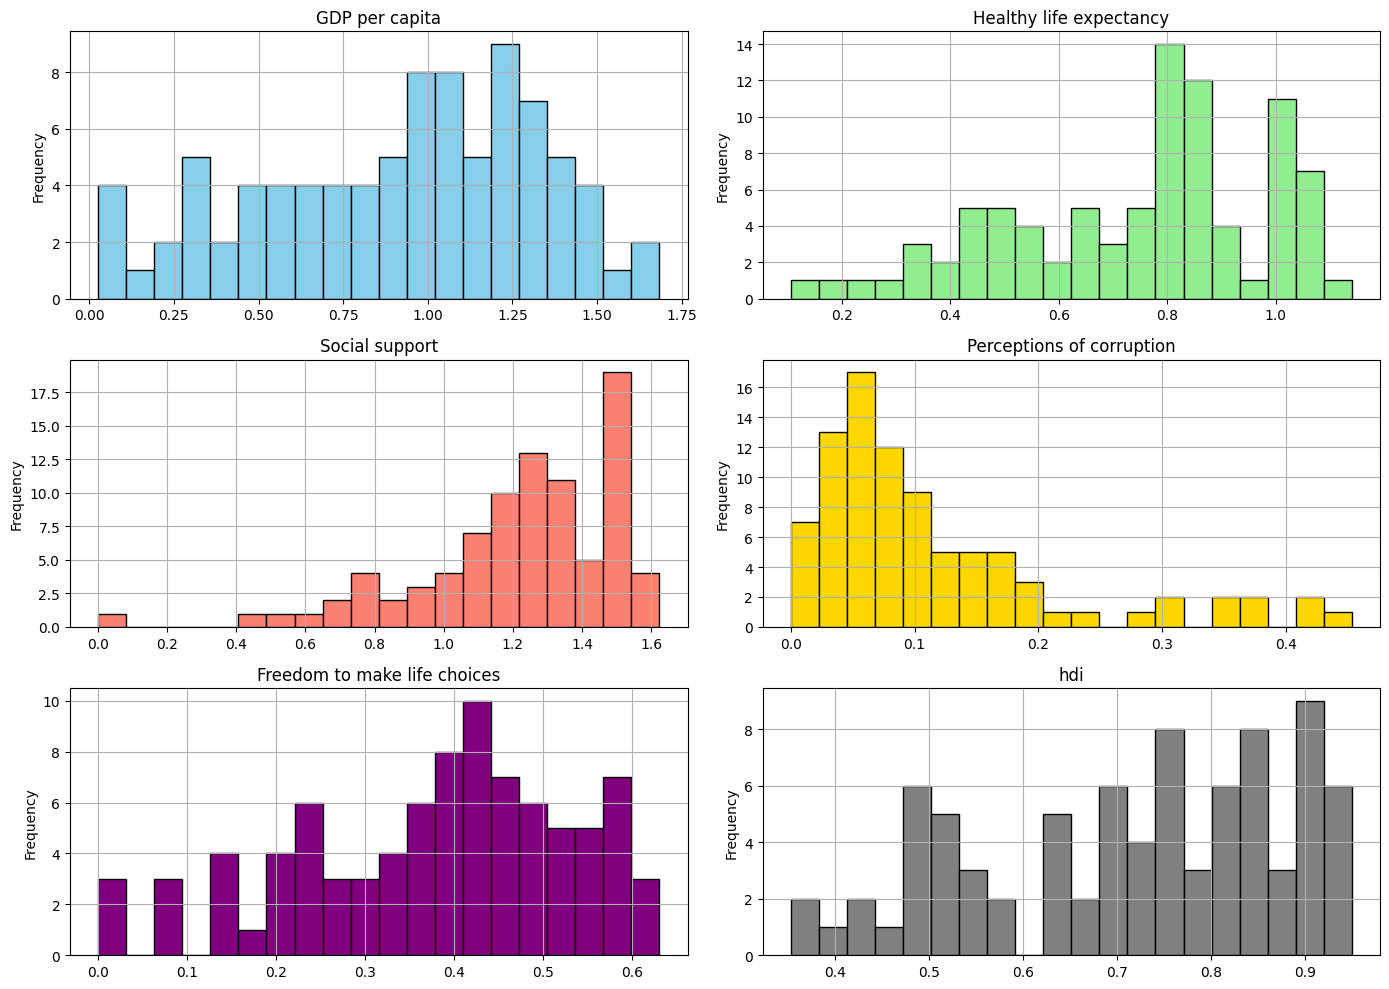

In [7]:
## Plot the frequency distribution / histogram of some of the numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
X_train['GDP per capita'].hist(ax=axes[0, 0], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('GDP per capita')
axes[0, 0].set_ylabel('Frequency')
X_train['Healthy life expectancy'].hist(ax=axes[0, 1], bins=20, edgecolor='black', color='lightgreen')
axes[0, 1].set_title('Healthy life expectancy')
axes[0, 1].set_ylabel('Frequency')
X_train['Social support'].hist(ax=axes[1, 0], bins=20, edgecolor='black', color='salmon')
axes[1, 0].set_title('Social support')
axes[1, 0].set_ylabel('Frequency')
X_train['Perceptions of corruption'].hist(ax=axes[1, 1], bins=20, edgecolor='black', color='gold')
axes[1, 1].set_title('Perceptions of corruption')
axes[1, 1].set_ylabel('Frequency')
X_train['Freedom to make life choices'].hist(ax=axes[2, 0], bins=20, edgecolor='black', color='purple')
axes[2, 0].set_title('Freedom to make life choices')
axes[2, 0].set_ylabel('Frequency')
X_train['hdi'].hist(ax=axes[2, 1], bins=20, edgecolor='black', color='grey')
axes[2, 1].set_title('hdi')
axes[2, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-8-4f5827913557>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub-region', data=X_train, ax=axes[0], palette="Set2", order=sub_region_counts.index)
<ipython-input-8-4f5827913557>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-8-4f5827913557>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=X_train, ax=axes[1], palette="Set1", order=region_counts.index)


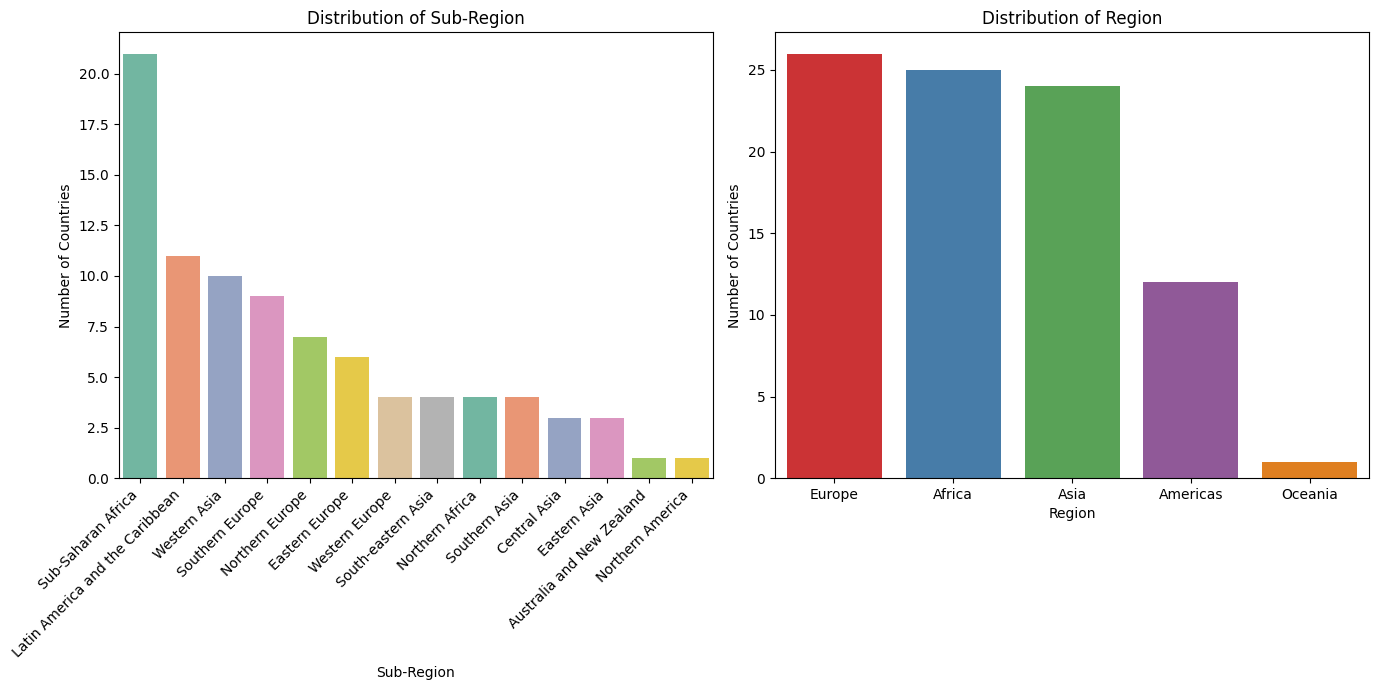

In [8]:
## Plot the categorical variables and their distribution

sub_region_counts = X_train['sub-region'].value_counts().sort_values(ascending=False)
region_counts = X_train['region'].value_counts().sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.countplot(x='sub-region', data=X_train, ax=axes[0], palette="Set2", order=sub_region_counts.index)
axes[0].set_title('Distribution of Sub-Region')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
axes[0].set_ylabel('Number of Countries')
axes[0].set_xlabel('Sub-Region')

sns.countplot(x='region', data=X_train, ax=axes[1], palette="Set1", order=region_counts.index)
axes[1].set_title('Distribution of Region')
axes[1].set_ylabel('Number of Countries')
axes[1].set_xlabel('Region')

plt.tight_layout()
plt.show()


<ipython-input-9-fccf0c0585c1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


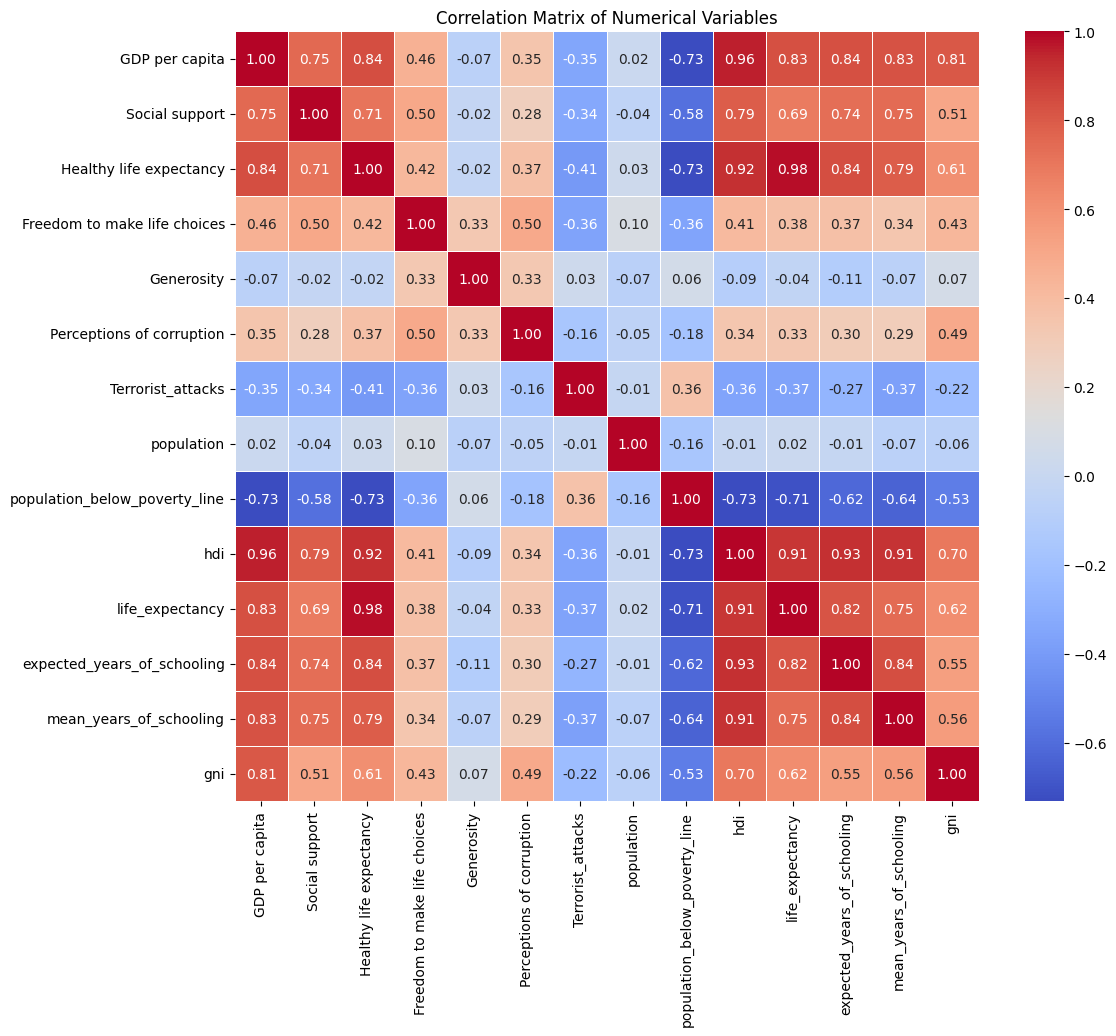

In [9]:
## Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


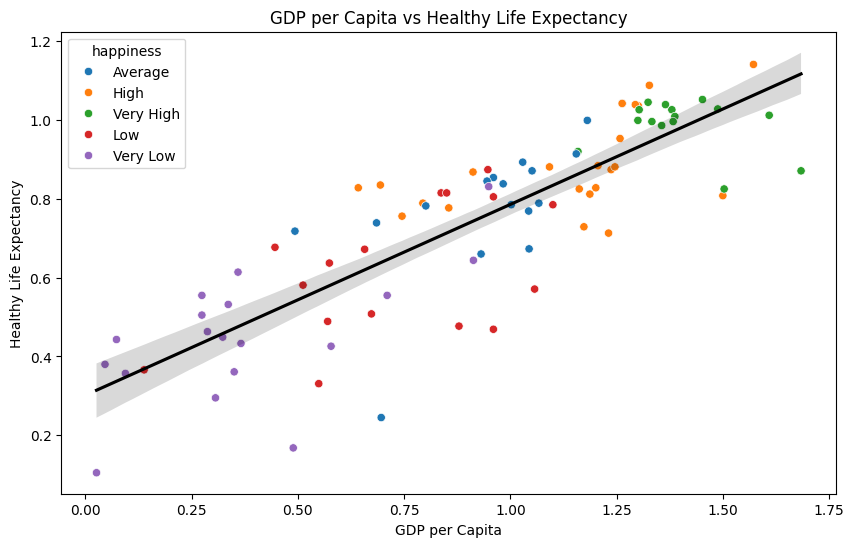

In [13]:
plot_df = X_train.copy()
plot_df['happiness'] = y_train_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Healthy life expectancy',
                hue='happiness',
                markers=["o", "s", "^", "D", "*"],
                data=plot_df,
                legend='full')
sns.regplot(x='GDP per capita', y='Healthy life expectancy', data=plot_df,
            scatter=False,
            color='black')
plt.title('GDP per Capita vs Healthy Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.legend(title='happiness')
plt.show()



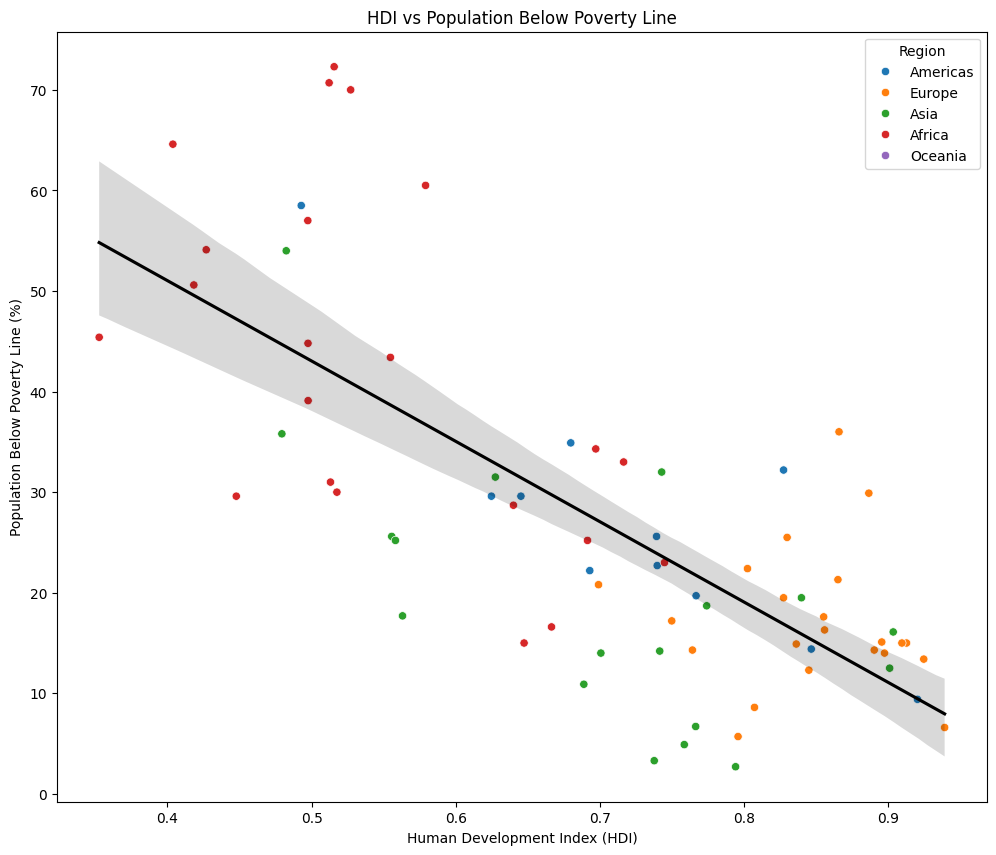

In [11]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='hdi', y='population_below_poverty_line',
                hue='region',
                markers=["o", "s", "^", "D", "*"],
                data=X_train,
                legend='full')

sns.regplot(x='hdi', y='population_below_poverty_line',
            data=X_train,
            scatter=False,
            color='black')

plt.title('HDI vs Population Below Poverty Line')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Population Below Poverty Line (%)')
plt.legend(title='Region')
plt.show()


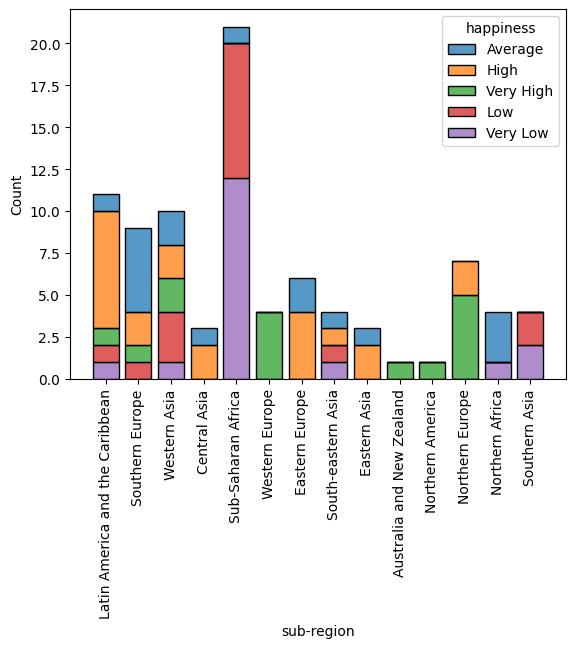

In [14]:
sns.histplot(binwidth=2, x="sub-region", hue="happiness", data=plot_df, stat="count", multiple="stack",  shrink=.8)
plt.xticks(rotation=90)

plt.show()


### insights on the EDA:

1. GDP per capita Distribution:
The distribution of GDP per capita is left-skewed, indicating that most countries have a higher GDP per capita, with fewer countries having a significantly lower GDP per capita.
2. Healthy Life Expectancy Distribution:
The distribution is left-skewed, with most countries having a higher healthy life expectancy, but a tail of countries with significantly lower healthy life expectancy.
3. Social Support Distribution:
The distribution is highly left-skewed, with most countries having a higher Social Support
4. Perceptions of Corruption Distribution:
The distribution is highly right-skewed, a large number of countries have lower perceptions of corruption, with a long tail of countries that have higher perceptions of corruption.
5. Freedom to Make Life Choices Distribution:
The distribution is extremely left-skewed, indicating a general trend towards more freedom.
6. HDI (Human Development Index) Distribution:
The distribution of HDI scores is relatively symmetrical, but with a slight concentration in the mid to high range of HDI scores, suggesting that a number of countries have a moderate to high level of human development.
7. Distribution of Sub-Region:
It has a varied distribution across different sub-regions, with some sub-regions having significantly more countries than others.
8. Distribution of Region:
The distribution among regions is uneven, especially for Oceania Region has significantly low number of countries.
9. Correlation Matrix of Numerical Variables:
The heatmap indicates there are several variables with moderate to strong correlations, especially between GDP per capita, healthy life expectancy, and HDI
10. GDP per Capita vs Healthy Life Expectancy:
There's a positive correlation between GDP per capita and healthy life expectancy, indicating that countries with higher GDP per capita tends to have longer Healthy Life Expectancy.
The color-coded target variables(happniess) in the plot shows that almost all the green points(very high) are centered at upper left with high GDP and high healthy life expectancy,
while purple points(very low) are centered at bottom left with low GDP and low healthy life expectancy, other labels tends to scattered in the middle space.
11. HDI vs Population Below Poverty Line:
The scatterplot shows a negative correlation between HDI and the percentage of the population below the poverty line, indicating that countries with higher HDI tends to have lower poverty rates.
The color-coded regions in the plot shows that this trend might vary by region, Europe (orange) and Americas (blue) tends to concentrated on the bottom right while Africa (red) tends to concentrated on the upper left.
12. the stacked bar plot: The distribution of happiness levels varies significantly across different sub-regions, indicating that geographical location may be an influential factor in predicting happiness.
Northern and Western Europe, show a higher proportion of 'Very High' happiness ratings compared to other regions, suggesting a higher overall happiness level or reporting in these areas.
Some sub-regions like Sub-Saharan Africa and Southern Asia tend to have higher counts in lower happiness categories

Since most features are not normal distributed and have some skewness this requires transformation or robust scaling in preprocess steps.
The variation in the number of countries per region and sub-region should be considered when handling categorical data to avoid bias towards more frequent categories.
High correlations between certain features like hdi and healthy life expectancy means multicollinearity should be considered during model selection and training.
Moreover, after merging two datasets we need to handle missing values appropriately; for instance, using a median for skewed distributions and mode for categorical data.




## preprocessing

preprocessing steps:
X_train.select_dtypes(['number']) selects all columns in X_train that contain numeric data types (int or float).
numeric_features.columns.tolist() converts column names of the numeric_features(df with all numerical columns)
into a list

I then changed SimpleImputer(strategy='constant', fill_value=0) to SimpleImputer(strategy='median') because I
think replace all missing values with 0 may not be good enough since it could be misleading. I used median to
fill all NA values because it is more robust to outliers and skewed distributions

StandardScaler(): "Standardize features by removing the mean and scaling to unit variance." This is essential
because many elements used in ML assumes all features are centered around 0 and have variance in the same order.
Without this step, if a feature has a variance that is orders of magnitude larger than others, it might dominate
 the objective function and make the estimator unable to learn from other features correctly as expected.

['region', 'sub-region']: selects categorical features in a list format
SimpleImputer(strategy='most_frequent'): fills NA values in categorical cols with the most frequent value per col
however, as we discovered in step one, there are no missing values in 'region' and 'sub-region'
OneHotEncoder(handle_unknown= 'ignore'): encode categorical features as a one-hot numeric array, creating a binary
column for each category and returns a sparse matrix or dense array. handle_unknown= 'ignore' means when
unknown category is encountered during transform, the one-hot encoded columns for this feature will be all zeros.

ColumnTransformer: this combines the numeric and categorical transformers into a single preprocessing step
preprocessor.fit(X_train): fits the preprocessor to X_train, it computes missing values for imputation
(median values and scaling for numeric columns, mode for categorical columns)

In [13]:
numeric_features = X_train.select_dtypes(['number'])## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocess=preprocessor.fit(X_train)

In [17]:
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data
X_train_transformed = preprocessor(X_train)
preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

## Fit model on preprocessed data and save preprocessor function and model

Random Forest using Hyperparams tuned by GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=4, min_samples_leaf=2, random_state=42)

model_2.fit(X_train_transformed, y_train_labels)
score = model_2.score(X_train_transformed, y_train_labels)
score

0.9659090909090909

In [22]:
from aimodelshare.aimsonnx import model_to_onnx
from skl2onnx.common.data_types import FloatTensorType
import aimodelshare as ai

feature_count= preprocessor(X_test).shape[1]
initial_type = [('float_input', FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
from aimodelshare.aws import set_credentials

apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)
mycompetition= ai.Competition(apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [24]:
prediction_labels = model_2.predict(preprocessor(X_test))
ai.export_preprocessor(preprocessor,"")
model_filepath2 = "model.onnx"
preprocessor_filepath="preprocessor.zip"
mycompetition.submit_model(model = model_filepath2,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1040

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [25]:
data = mycompetition.get_leaderboard()
RFresult = mycompetition.stylize_leaderboard(data)
RFresult

In [37]:
data[data['version'] == 1040]

accuracy  f1_score  precision    recall ml_framework deep_learning  \
223  0.470588  0.466153   0.612857  0.484286      sklearn           NaN   

                 model_type  depth  num_params  flatten_layers  ...  relu_act  \
223  RandomForestClassifier    NaN         NaN             NaN  ...       NaN   

     tanh_act  softmax_act  loss  optimizer  memory_size  team     username  \
223       NaN          NaN   NaN        NaN          NaN   NaN  qingxuanguo   

                      timestamp  version  
223  2024-02-20 22:31:51.722849     1040  

[1 rows x 24 columns]

deep learning model

Epoch 1/100
4/4 [==============================] - 1s 118ms/step - loss: 1.6098 - accuracy: 0.2424 - val_loss: 1.6206 - val_accuracy: 0.2273
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5963 - accuracy: 0.2424 - val_loss: 1.6123 - val_accuracy: 0.2273
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 1.5850 - accuracy: 0.2424 - val_loss: 1.6012 - val_accuracy: 0.2273
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 1.5736 - accuracy: 0.2879 - val_loss: 1.5932 - val_accuracy: 0.2273
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 1.5621 - accuracy: 0.3485 - val_loss: 1.5833 - val_accuracy: 0.2273
Epoch 6/100
4/4 [==============================] - 0s 35ms/step - loss: 1.5497 - accuracy: 0.3636 - val_loss: 1.5727 - val_accuracy: 0.3182
Epoch 7/100
4/4 [==============================] - 0s 32ms/step - loss: 1.5370 - accuracy: 0.3788 - val_loss: 1.5638 - val_accuracy: 0.3182
Epoch 8/100
4/4 [==

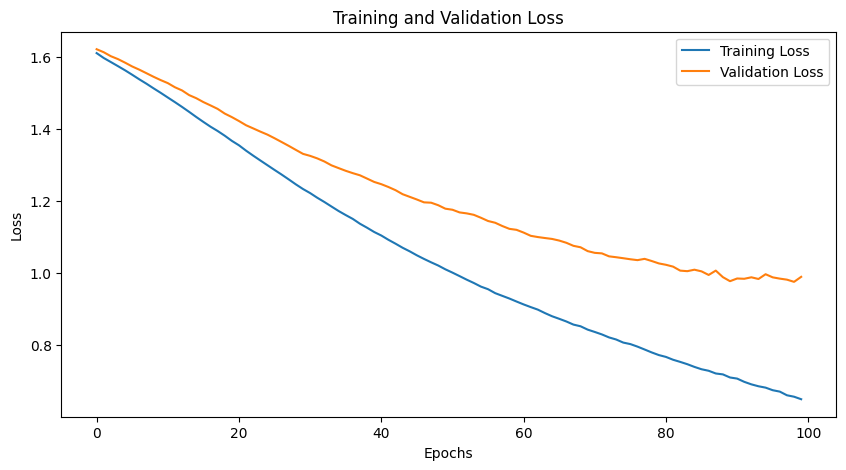

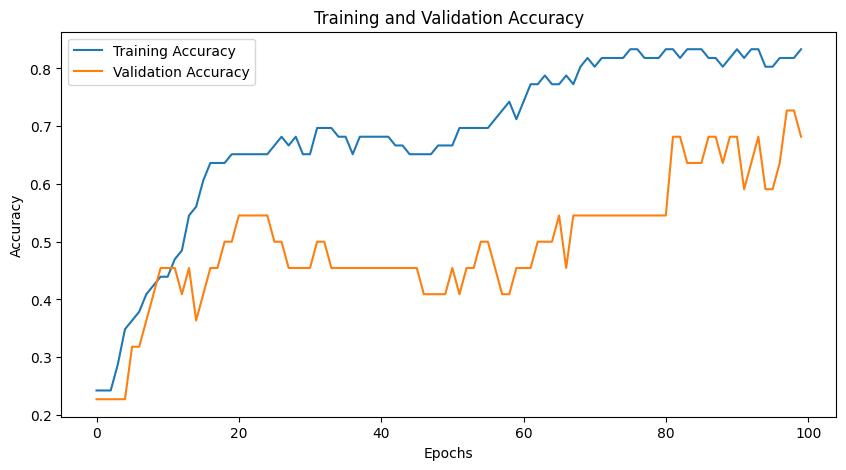

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=X_train_transformed.shape[1]

output_neurons = y_train.shape[1]
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(output_neurons, activation='softmax')  # Use softmax for multi-class classification
])





keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


dl = keras_model.fit(preprocessor(X_train), y_train,
               batch_size = 20,
               epochs = 100, validation_split=0.25)



# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(dl.history['loss'], label='Training Loss')
plt.plot(dl.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(dl.history['accuracy'], label='Training Accuracy')
plt.plot(dl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


I used Categorical crossentropy since it measures the difference between the predicted probabilities and the actual distribution, and SGD for a robust optimizer
I improve the deep learning model by setting the epochs to 100.
this is because on the previouse plot, I notice that the validation loss starts to increase after epochs reaches 100
and this step indeed increase the accuracy of this model

In [31]:
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("keras_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
predictions = keras_model.predict(preprocessor(X_test))
prediction_column_index= np.argmax(predictions, axis=1)

prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath5 = "keras_model.onnx"

mycompetition.submit_model(model = model_filepath5,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 5ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1041

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [38]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [39]:
data[data['version'] == 1041]

accuracy  f1_score  precision    recall ml_framework deep_learning  \
325       0.5  0.464859   0.563853  0.535714        keras          True   

     model_type  depth  num_params  flatten_layers  ...  relu_act  tanh_act  \
325  Sequential    5.0     19013.0             NaN  ...       4.0       NaN   

     softmax_act  loss  optimizer  memory_size  team     username  \
325          1.0   str        SGD      77456.0   NaN  qingxuanguo   

                      timestamp  version  
325  2024-02-20 22:35:20.578072     1041  

[1 rows x 24 columns]